# Credit Amount EDA Case Study

### Introduction

We have loan applications data for about 307k applications. The goal of this case is to perform Risk Analytics with the help of data wrangling and visualisation libraries of Python. The end goal is to derive important insights for the bank to identify the characteristics for bad loan applications. ( Bad loans are loans which are delayed/not paid.)

### Objectives

* Identify what are some common characteristics of bad loan applications
* Identify if there are any patterns related to applicants with loan difficulties
* Identify the driving factors or strong indicators of a bad loan application

### Data Dictionary 

A common starting point in any EDA problem is - Understanding the data. 

The first step is to check if there is a data dictionary availalble, and try to get a good understanding of the 
level of the data and meaning of each of the columns.

The data dictionary document has been provided along with the data. It is advised to go through each of the column in 
data once before starting with EDA.

A screenshot of the same is given below - 

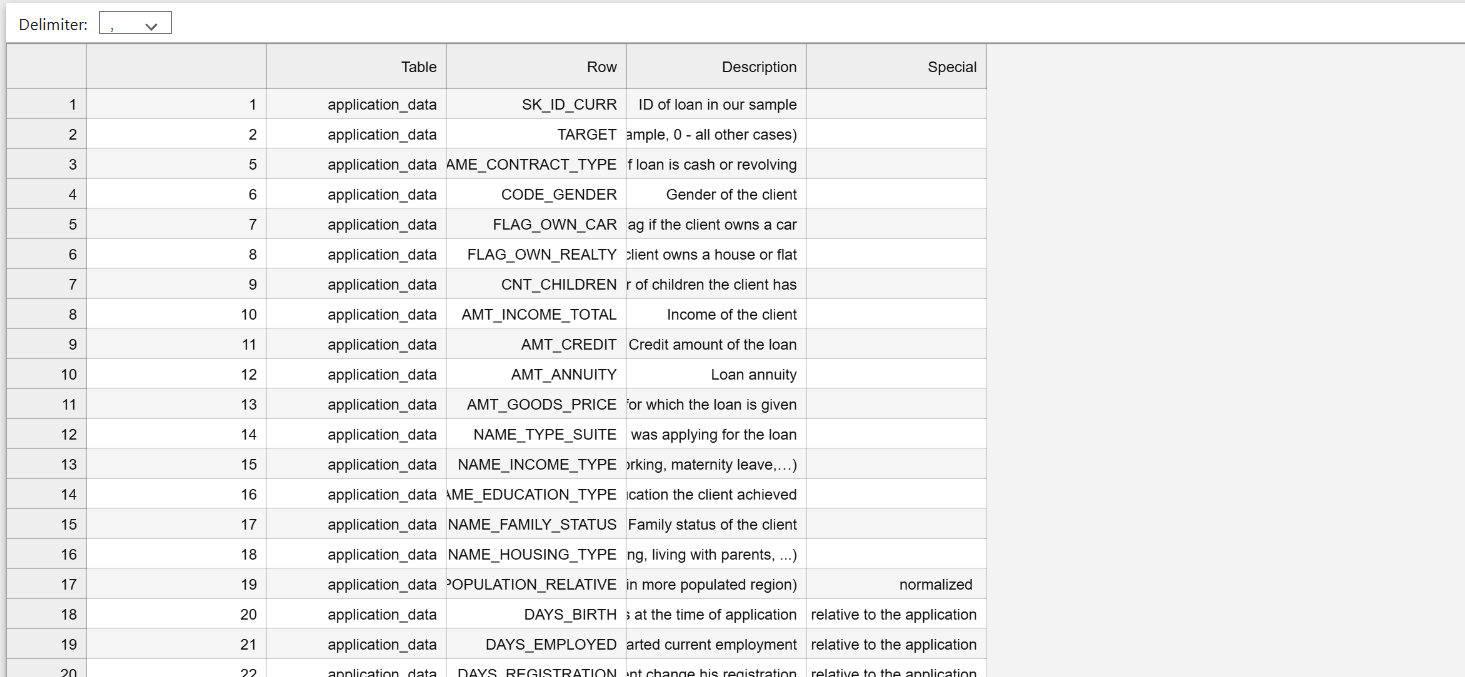

The dictionary can also be imported to Jupyter notebook as below - 

# EDA - Credit Applications 

##### Let's begin our EDA now. The flow of the entire case would be as follows - 

1. Data Wrangling
 * Data load 
 * Data shape
 * Data types
 * 5 point summary (describe)
 * Data Preprocessing 
      * Missing Values 
      * Outlier CHeck 
      * Correlation check 
      * Feature Engineering 
      * Normaliztion, Encoding (only required at ML model stage)
2. Univariate Analysis
3. Bivariate/Multivariate Analysis
4. Final Insights

## Importing libraries

In [9]:
#importing core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline   


In [10]:
# Setting theme for charts

plt.style.use('ggplot')

## 1. Data Wrangling 

Loading the data - 

In [11]:
credit_data = pd.read_csv("application_data.csv")
credit_data.head(20)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.500,24700.500,...,0,0,0,0,0.000,0.000,0.000,0.000,0.000,1.000
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.500,35698.500,...,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.000,6750.000,...,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.500,29686.500,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.000,21865.500,...,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.500,27517.500,...,0,0,0,0,0.000,0.000,0.000,0.000,1.000,1.000
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.000,41301.000,...,0,0,0,0,0.000,0.000,0.000,1.000,1.000,2.000
7,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.000,42075.000,...,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.000,33826.500,...,0,0,0,0,0.000,0.000,0.000,0.000,0.000,1.000
9,100012,0,Revolving loans,M,N,Y,0,135000.000,405000.000,20250.000,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


### 1.1 Inspecting data

In [12]:
# Checking shape of the data

credit_data.shape

(307511, 122)

In [13]:
# Checking 5 point summary with describe function

credit_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000,307511.000,307511.000,307511.000,307511.000,307499.000,307233.000,307511.000,307511.000,307511.000,...,307511.000,307511.000,307511.000,307511.000,265992.000,265992.000,265992.000,265992.000,265992.000,265992.000
mean,278180.519,0.081,0.417,168797.919,599026.000,27108.574,538396.207,0.021,-16036.995,63815.046,...,0.008,0.001,0.001,0.000,0.006,0.007,0.034,0.267,0.265,1.900
std,102790.175,0.272,0.722,237123.146,402490.777,14493.737,369446.461,0.014,4363.989,141275.767,...,0.090,0.024,0.023,0.018,0.084,0.111,0.205,0.916,0.794,1.869
min,100002.000,0.000,0.000,25650.000,45000.000,1615.500,40500.000,0.000,-25229.000,-17912.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,189145.500,0.000,0.000,112500.000,270000.000,16524.000,238500.000,0.010,-19682.000,-2760.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,278202.000,0.000,0.000,147150.000,513531.000,24903.000,450000.000,0.019,-15750.000,-1213.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
75%,367142.500,0.000,1.000,202500.000,808650.000,34596.000,679500.000,0.029,-12413.000,-289.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000
max,456255.000,1.000,19.000,117000000.000,4050000.000,258025.500,4050000.000,0.073,-7489.000,365243.000,...,1.000,1.000,1.000,1.000,4.000,9.000,8.000,27.000,261.000,25.000


### 1.2 Data Cleaning 

In [14]:
# Null % for all columns in data

null_perc = credit_data.isnull().sum()/len(credit_data)*100

In [15]:
pd.set_option('display.max_rows', 500)

In [16]:
# Top 60 cols with maximum null % 

null_perc.sort_values(ascending = False)

COMMONAREA_MEDI                69.872
COMMONAREA_AVG                 69.872
COMMONAREA_MODE                69.872
NONLIVINGAPARTMENTS_MODE       69.433
NONLIVINGAPARTMENTS_AVG        69.433
NONLIVINGAPARTMENTS_MEDI       69.433
FONDKAPREMONT_MODE             68.386
LIVINGAPARTMENTS_MODE          68.355
LIVINGAPARTMENTS_AVG           68.355
LIVINGAPARTMENTS_MEDI          68.355
FLOORSMIN_AVG                  67.849
FLOORSMIN_MODE                 67.849
FLOORSMIN_MEDI                 67.849
YEARS_BUILD_MEDI               66.498
YEARS_BUILD_MODE               66.498
YEARS_BUILD_AVG                66.498
OWN_CAR_AGE                    65.991
LANDAREA_MEDI                  59.377
LANDAREA_MODE                  59.377
LANDAREA_AVG                   59.377
BASEMENTAREA_MEDI              58.516
BASEMENTAREA_AVG               58.516
BASEMENTAREA_MODE              58.516
EXT_SOURCE_1                   56.381
NONLIVINGAREA_MODE             55.179
NONLIVINGAREA_AVG              55.179
NONLIVINGARE

In [17]:
# Filtered list of Columns & NULL counts where NULL values are more than 45%
null_col = credit_data.isnull().sum().sort_values(ascending = False)
null_col = null_col[null_col.values >(0.45*len(credit_data))]
null_col

COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAPARTMENTS_MEDI        213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
LIVINGAPARTMENTS_MEDI           210199
FLOORSMIN_AVG                   208642
FLOORSMIN_MODE                  208642
FLOORSMIN_MEDI                  208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_MODE                204488
YEARS_BUILD_AVG                 204488
OWN_CAR_AGE                     202929
LANDAREA_MEDI                   182590
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MODE              169682
NONLIVINGAREA_AVG        

In [18]:
no=len(null_col)
print("There are "+ str(no) + " columns with more than 45% NULLs")


There are 49 columns with more than 45% NULLs


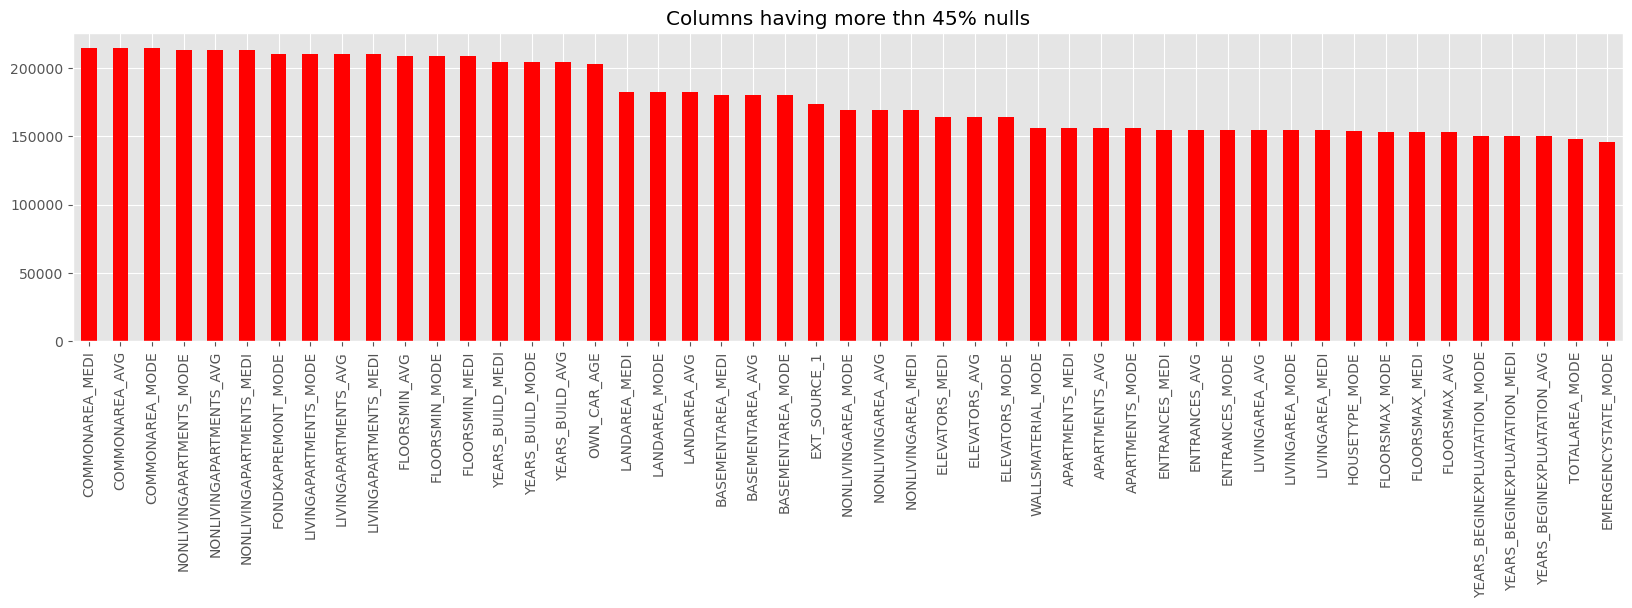

In [19]:
plt.figure(figsize=(20,4))
null_col.plot(kind='bar', color="red")
plt.title('Columns having more thn 45% nulls')
plt.show()

In [20]:
a = (credit_data.isnull().sum()/len(credit_data))
list(a[a.values>=0.45].index)

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MOD

In [21]:
# Function to remove the columns having percentage of null values > 45%
def remove_null_cols(data):
    perc=0.45    

    # Deciding cut-off NULL % to be 45%
    df = data.copy()                                                      # Creating a copy of data
    shape_before = df.shape                                               # Storing the shape of data before removal of columns
    remove_cols = (df.isnull().sum()/len(df))                             # Calculating % of NULLs
    remove_cols = list(remove_cols[remove_cols.values>=perc].index)
    # Filtering cols with NULLs>45%
    df.drop(labels = remove_cols,axis =1,inplace=True)                    # Dropping cols
    print("Number of Columns dropped\t: ",len(remove_cols))    
    print("\nOld dataset rows,columns",shape_before,"\nNew dataset rows,columns",df.shape)
    return df

In [22]:
# Removing cols with more than 45% nulls. Now we'll be using credit_data_1 for further analysis

credit_data_1 = remove_null_cols(credit_data)

Number of Columns dropped	:  49

Old dataset rows,columns (307511, 122) 
New dataset rows,columns (307511, 73)


In [23]:
# Checking the % of null values for each column in new dataset
null_perc_1 = credit_data_1.isnull().sum()/len(credit_data_1)*100
null_perc_1.sort_values(ascending = False).head(60)

OCCUPATION_TYPE              31.346
EXT_SOURCE_3                 19.825
AMT_REQ_CREDIT_BUREAU_YEAR   13.502
AMT_REQ_CREDIT_BUREAU_QRT    13.502
AMT_REQ_CREDIT_BUREAU_MON    13.502
AMT_REQ_CREDIT_BUREAU_WEEK   13.502
AMT_REQ_CREDIT_BUREAU_DAY    13.502
AMT_REQ_CREDIT_BUREAU_HOUR   13.502
NAME_TYPE_SUITE               0.420
OBS_30_CNT_SOCIAL_CIRCLE      0.332
DEF_30_CNT_SOCIAL_CIRCLE      0.332
OBS_60_CNT_SOCIAL_CIRCLE      0.332
DEF_60_CNT_SOCIAL_CIRCLE      0.332
EXT_SOURCE_2                  0.215
AMT_GOODS_PRICE               0.090
AMT_ANNUITY                   0.004
CNT_FAM_MEMBERS               0.001
DAYS_LAST_PHONE_CHANGE        0.000
FLAG_DOCUMENT_17              0.000
FLAG_DOCUMENT_18              0.000
FLAG_DOCUMENT_21              0.000
FLAG_DOCUMENT_20              0.000
FLAG_DOCUMENT_19              0.000
FLAG_DOCUMENT_2               0.000
FLAG_DOCUMENT_3               0.000
FLAG_DOCUMENT_4               0.000
FLAG_DOCUMENT_5               0.000
FLAG_DOCUMENT_16            

### 1.3 Imputing Missing Data

In [75]:
credit_data_1["AMT_REQ_CREDIT_BUREAU_YEAR"].value_counts()

AMT_REQ_CREDIT_BUREAU_YEAR
0.000     71801
1.000     63405
2.000     50192
3.000     33628
4.000     20714
5.000     12052
6.000      6967
7.000      3869
8.000      2127
9.000      1096
11.000       31
12.000       30
10.000       22
13.000       19
14.000       10
17.000        7
15.000        6
19.000        4
18.000        4
16.000        3
25.000        1
23.000        1
22.000        1
21.000        1
20.000        1
Name: count, dtype: int64

In [24]:

print(credit_data_1.AMT_REQ_CREDIT_BUREAU_YEAR.mode())
print(credit_data_1.AMT_REQ_CREDIT_BUREAU_MON.mode())
print(credit_data_1.AMT_REQ_CREDIT_BUREAU_WEEK.mode())
print(credit_data_1.AMT_REQ_CREDIT_BUREAU_DAY.mode())
print(credit_data_1.AMT_REQ_CREDIT_BUREAU_HOUR.mode())
print(credit_data_1.AMT_REQ_CREDIT_BUREAU_QRT.mode())

0   0.000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64
0   0.000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64
0   0.000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64
0   0.000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64
0   0.000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64
0   0.000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64


In [25]:
credit_data_2 = credit_data_1.copy() # Making copy of our last data

In [26]:
# Imputing null with 0s

impute_list = ['AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_WEEK',
               'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_QRT']

for i in impute_list:
        credit_data_2[i] = credit_data_1[i].fillna(0)
                         

In [27]:
null_perc_2 = credit_data_2.isnull().sum()/len(credit_data_2)*100
null_perc_2.sort_values(ascending = False).head(60)

OCCUPATION_TYPE              31.346
EXT_SOURCE_3                 19.825
NAME_TYPE_SUITE               0.420
OBS_30_CNT_SOCIAL_CIRCLE      0.332
DEF_30_CNT_SOCIAL_CIRCLE      0.332
OBS_60_CNT_SOCIAL_CIRCLE      0.332
DEF_60_CNT_SOCIAL_CIRCLE      0.332
EXT_SOURCE_2                  0.215
AMT_GOODS_PRICE               0.090
AMT_ANNUITY                   0.004
CNT_FAM_MEMBERS               0.001
DAYS_LAST_PHONE_CHANGE        0.000
FLAG_DOCUMENT_10              0.000
FLAG_DOCUMENT_2               0.000
FLAG_DOCUMENT_3               0.000
FLAG_DOCUMENT_4               0.000
FLAG_DOCUMENT_5               0.000
FLAG_DOCUMENT_6               0.000
FLAG_DOCUMENT_7               0.000
FLAG_DOCUMENT_8               0.000
FLAG_DOCUMENT_9               0.000
SK_ID_CURR                    0.000
FLAG_DOCUMENT_11              0.000
FLAG_DOCUMENT_20              0.000
AMT_REQ_CREDIT_BUREAU_QRT     0.000
AMT_REQ_CREDIT_BUREAU_MON     0.000
AMT_REQ_CREDIT_BUREAU_WEEK    0.000
AMT_REQ_CREDIT_BUREAU_DAY   

In [28]:
# Verifying count of NULLs after imputaion

print(credit_data_2['AMT_REQ_CREDIT_BUREAU_YEAR'].isnull().sum())
print(credit_data_2['AMT_REQ_CREDIT_BUREAU_MON'].isnull().sum())
print(credit_data_2['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull().sum())
print(credit_data_2['AMT_REQ_CREDIT_BUREAU_DAY'].isnull().sum())
print(credit_data_2['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull().sum())
print(credit_data_2['AMT_REQ_CREDIT_BUREAU_QRT'].isnull().sum())

0
0
0
0
0
0


### 1.4 Fixing erroneous data

In [29]:
# Confirming that all DAYS fields have -ve values

print(credit_data['DAYS_BIRTH'].unique())
print(credit_data['DAYS_EMPLOYED'].unique())
print(credit_data['DAYS_REGISTRATION'].unique())
print(credit_data['DAYS_ID_PUBLISH'].unique())
print(credit_data['DAYS_LAST_PHONE_CHANGE'].unique())

[ -9461 -16765 -19046 ...  -7951  -7857 -25061]
[  -637  -1188   -225 ... -12971 -11084  -8694]
[ -3648.  -1186.  -4260. ... -16396. -14558. -14798.]
[-2120  -291 -2531 ... -6194 -5854 -6211]
[-1134.  -828.  -815. ... -3988. -3899. -3538.]


In [30]:
# Preparing the list of columns to be treated

erroneous_cols = [cols for cols in credit_data_2.columns if cols.startswith('DAYS')]
erroneous_cols

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [31]:
# Changing the column values with Absolute values using abs function

credit_data_2[erroneous_cols]= abs(credit_data_2[erroneous_cols])

In [32]:
# Verifying absence of -ve values in data

credit_data_2.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000,307511.000,307511.000,307511.000,307511.000,307499.000,307233.000,307511.000,307511.000,307511.000,...,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000
mean,278180.519,0.081,0.417,168797.919,599026.000,27108.574,538396.207,0.021,16036.995,67724.742,...,0.008,0.001,0.001,0.000,0.006,0.006,0.030,0.231,0.230,1.643
std,102790.175,0.272,0.722,237123.146,402490.777,14493.737,369446.461,0.014,4363.989,139443.752,...,0.090,0.024,0.023,0.018,0.078,0.103,0.191,0.857,0.744,1.856
min,100002.000,0.000,0.000,25650.000,45000.000,1615.500,40500.000,0.000,7489.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,189145.500,0.000,0.000,112500.000,270000.000,16524.000,238500.000,0.010,12413.000,933.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,278202.000,0.000,0.000,147150.000,513531.000,24903.000,450000.000,0.019,15750.000,2219.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
75%,367142.500,0.000,1.000,202500.000,808650.000,34596.000,679500.000,0.029,19682.000,5707.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000
max,456255.000,1.000,19.000,117000000.000,4050000.000,258025.500,4050000.000,0.073,25229.000,365243.000,...,1.000,1.000,1.000,1.000,4.000,9.000,8.000,27.000,261.000,25.000


### 1.5 Adding new columns by Binning Continuous Variables

In [33]:
# Note : New function pd.qcut

# Using pd.qcut function to bin AMT_INCOME_TOTAL into 5 categories

credit_data_2['AMT_INCOME_RANGE'] = pd.qcut(credit_data_2.AMT_INCOME_TOTAL, 
                                            q=[0, 0.2, 0.5, 0.8, 0.95, 1], 
                                            labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
credit_data_2['AMT_INCOME_RANGE'].head(7)

0      MEDIUM
1        HIGH
2    VERY_LOW
3         LOW
4         LOW
5    VERY_LOW
6      MEDIUM
Name: AMT_INCOME_RANGE, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

In [34]:
# Using pd.qcut function to bin AMT_CREDIT_RANGE into 5 categories

credit_data_2['AMT_CREDIT_RANGE'] = pd.qcut(credit_data_2.AMT_CREDIT, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
credit_data_2['AMT_CREDIT_RANGE'].head(7)

0          LOW
1         HIGH
2     VERY_LOW
3          LOW
4          LOW
5          LOW
6    VERY_HIGH
Name: AMT_CREDIT_RANGE, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

### 1.6 Splitting data based on TARGET

In [35]:
# SPlitting data as per TARGET into deafulter and non-defaulter datasets

defaulter = credit_data_2[credit_data_2.TARGET==1]
non_defaulter =  credit_data_2[credit_data_2.TARGET==0]

In [36]:
# Checking row counts of data split as per TARGET

print(" Defaulter data shape - " + str(defaulter.shape) )
print(" Non-Defaulter data shape - " + str(non_defaulter.shape) )

 Defaulter data shape - (24825, 75)
 Non-Defaulter data shape - (282686, 75)


In [37]:
# Checking % of data split as per TARGET

print(" Defaulter data % - " + str(round(defaulter.shape[0]*100/credit_data_2.shape[0],2) ))
print(" Non-Defaulter data % - " + str(round(non_defaulter.shape[0]*100/credit_data_2.shape[0],2) ))

 Defaulter data % - 8.07
 Non-Defaulter data % - 91.93


## 2. Univariate Analysis

In [38]:
len(credit_data_2.columns)

75

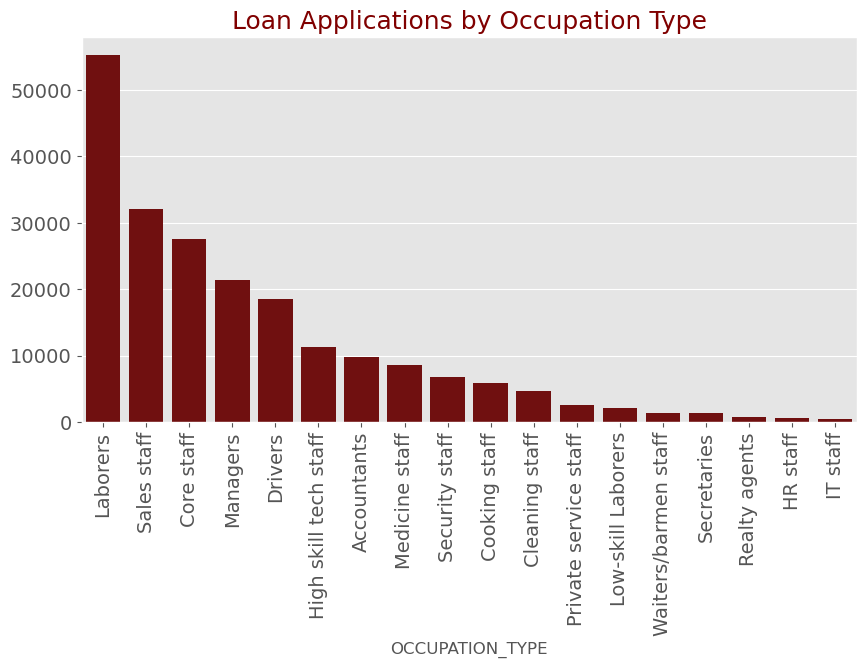

In [40]:
# Distribution of 'OCCUPATION_TYPE'

temp = credit_data_2["OCCUPATION_TYPE"].value_counts()                      # Value counts for Occupation type
sns.barplot(x=temp.index, y = temp.values, color = 'maroon')                # Plotting bar graph
_=plt.xticks(rotation=90, size = 14)                                        # Rotating x axis ticks so that values dont overlap
_=plt.yticks( size = 14)                                                    # Adjusting size for y txis ticks
_=plt.title('Loan Applications by Occupation Type', size=18,color = 'maroon') # Chart title
plt.show()

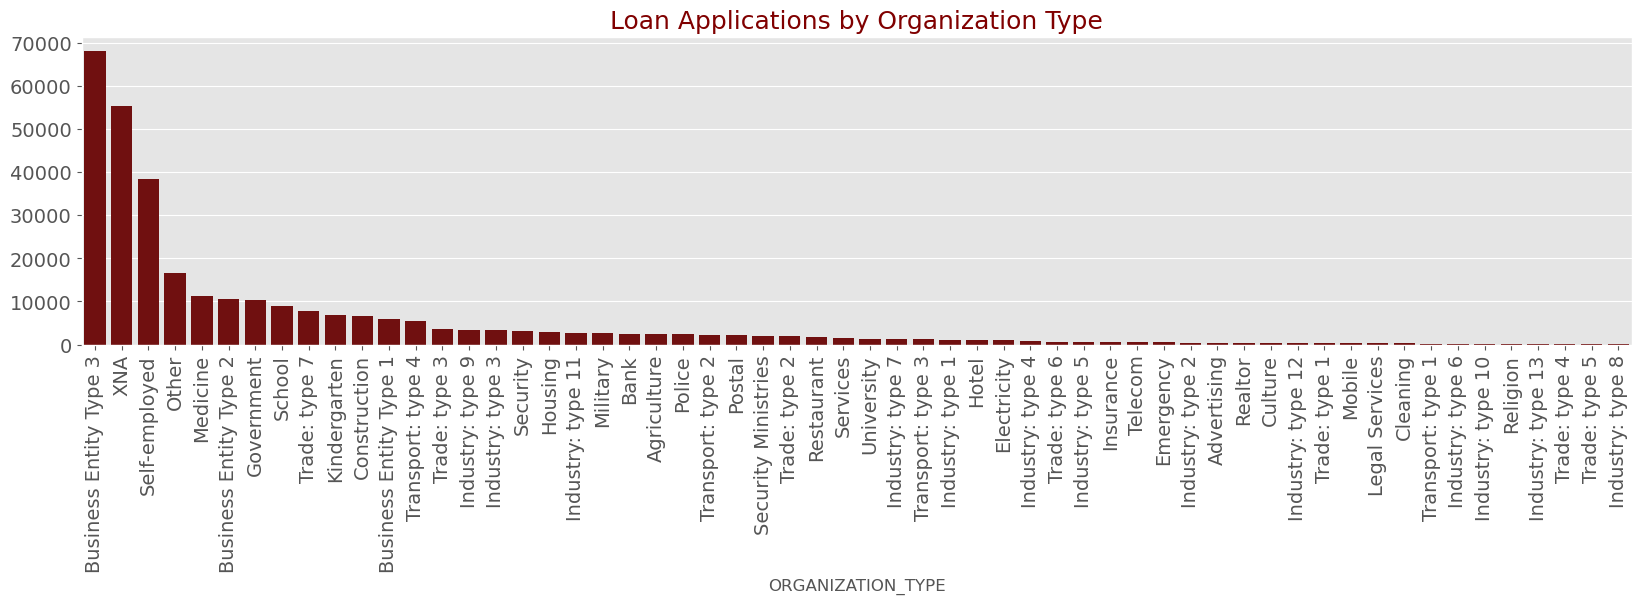

In [52]:
# Distribution of 'Organization Type'
plt.figure(figsize=(20,4))
temp = credit_data_2["ORGANIZATION_TYPE"].value_counts()
sns.barplot(x=temp.index, y = temp.values, color = 'maroon')
_=plt.xticks(rotation=90, size = 14)
_=plt.yticks( size = 14)
_=plt.title('Loan Applications by Organization Type', size=18,color = 'maroon')
plt.show()

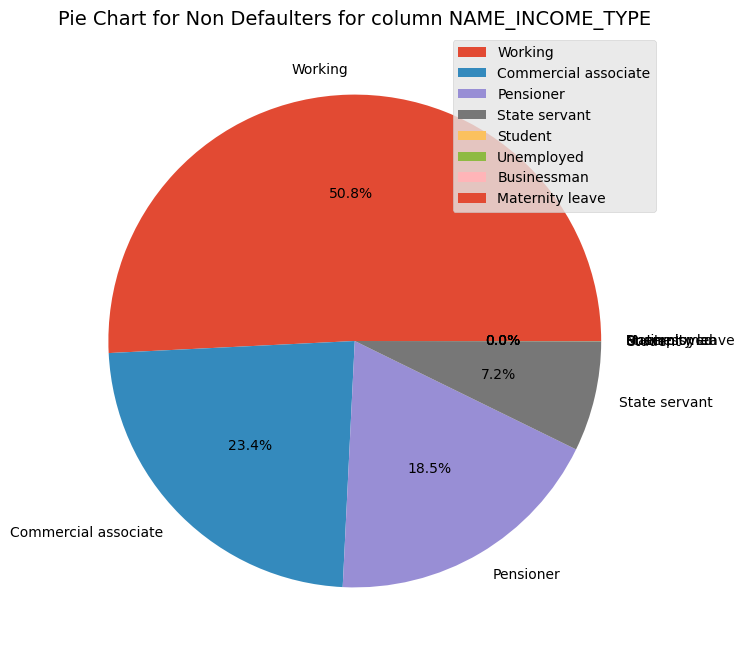

In [65]:
column='NAME_INCOME_TYPE'
# counts=defaulter[column].value_counts()
# Plotting the pie chart
data = non_defaulter[column].value_counts()
data_df = pd.DataFrame({'labels': data.index,'values': data.values})
plt.figure(figsize=(8, 8))
plt.pie(data_df['values'], labels=data_df['labels'], autopct='%0.1f%%')
plt.title(f"Pie Chart for Non Defaulters for column {column}", fontsize=14)
plt.legend()
plt.show()

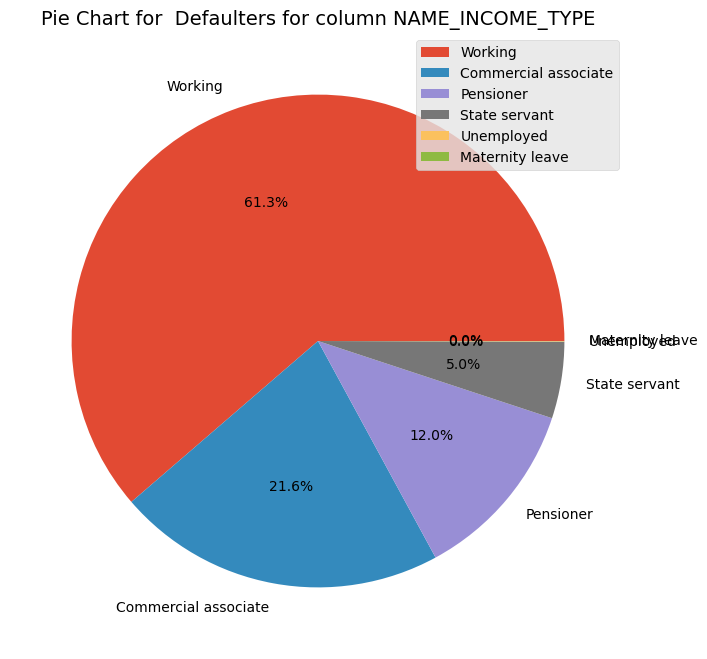

In [66]:
column='NAME_INCOME_TYPE'
# Plotting the pie chart
data = defaulter[column].value_counts()
data_df = pd.DataFrame({'labels': data.index,'values': data.values})
plt.figure(figsize=(8, 8))
plt.pie(data_df['values'], labels=data_df['labels'], autopct='%0.1f%%')
plt.title(f"Pie Chart for  Defaulters for column {column}", fontsize=14)
plt.legend()
plt.show()

## 3. Bivariate & Multivariate Analysis

Bivariate Analysis - 

It is one of the simplest form of statistical analysis where 2 variables are involved. It looks for relationship among the 2 variables.
The applications involve hypothesis validation of association among variables, finding trends, regression etc.

Multivariate Analysis-

When more than 2 variable are involved in an analysis, it will be a multi-variate analysis. The additional variables may take form of hue color, 3rd axis etc. 

In [55]:
# Example: Plotting a bivariate scatterplot between two variables
def plot_bivariate(data, x_col, y_col):
    plt.figure(figsize=(10, 6))
    sns.barplot(data=data, x=x_col, y=y_col, color='#4CAF50', alpha=0.8)
    plt.title(f"Scatterplot of {x_col} vs {y_col}", fontsize=14)
    plt.xlabel(x_col, fontsize=12)
    plt.ylabel(y_col, fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

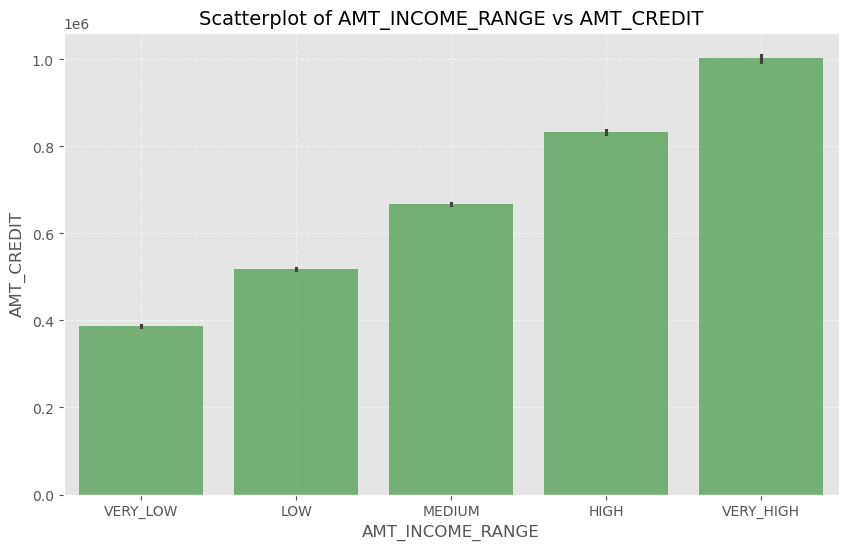

In [56]:
plot_bivariate(credit_data_2,"AMT_INCOME_RANGE","AMT_CREDIT")

In [69]:
# Function for Multivariate analysis

def multivariate(col1,col2,col3):                                            # Takes 3 columns as inputs

    fig, axes=plt.subplots(nrows =1,ncols=2,figsize=(20,12))               
    
    axes[0].set_title("Boxplot (Non-Defaulter) for  "  )
    _=sns.boxplot(data=non_defaulter,x=col1, y=col2,palette = 'rainbow', hue= col3,ax=axes[0])
    _=axes[0].set_title('Loan Amount by  ' + col2 + ' & ' + col3 + ' (Non-Defaulter)', size=15,color = 'blue')

    axes[1].set_title("Boxplot (Defaulter) for  "  )
    _=sns.boxplot(data=defaulter,x=col1, y=col2,palette = 'rainbow', hue= col3,ax=axes[1])
    _=axes[1].set_title('Loan Amount by  ' + col2 + ' & ' + col3 + ' (Defaulter)', size=15,color = 'blue')
    plt.show()

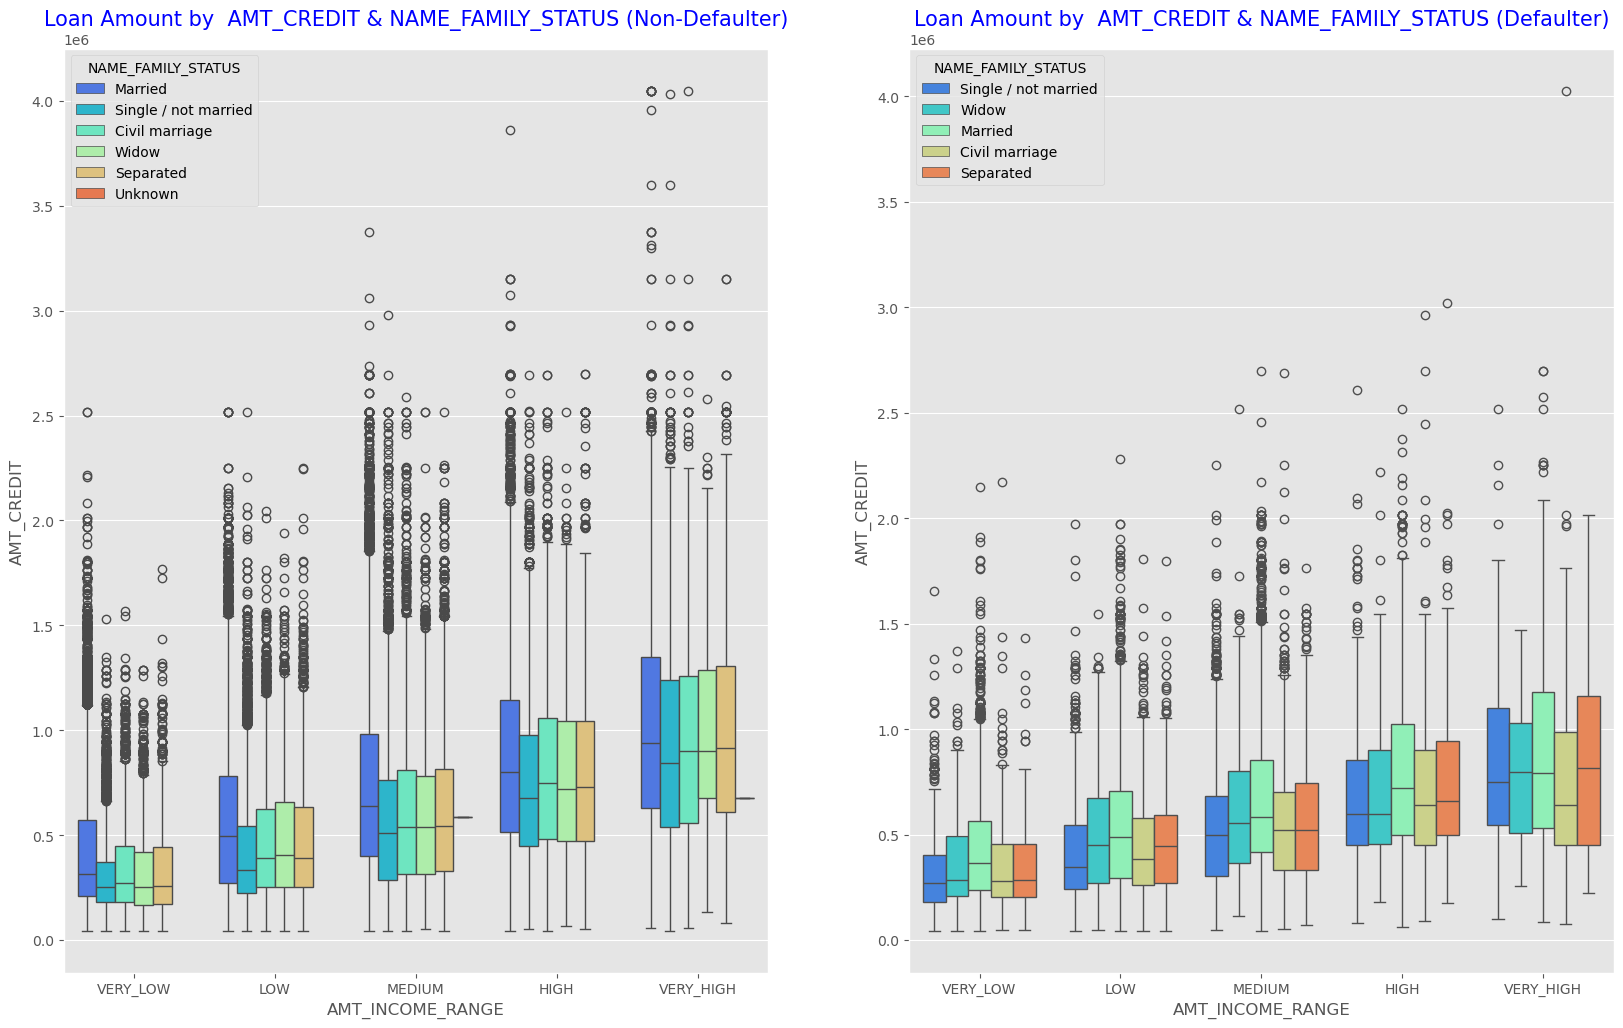

In [76]:
# Analysis of AMT_INCOME_RANGE, AMT_CREDIT & NAME_FAMILY_STATUS

multivariate('AMT_INCOME_RANGE','AMT_CREDIT','NAME_FAMILY_STATUS')

Insights-
* With increase in Income range, the loan amount increases proportionally.
* On family status axis, we observe that Married applicants have higher loan amount than others.